In [1]:
!git clone https://github.com/lc4324/260-PGD.git

Cloning into '260-PGD'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 71 (delta 36), reused 50 (delta 17), pack-reused 0
Unpacking objects: 100% (71/71), done.


In [2]:
# copy dataset from google drive
# need to upload the dataset to google drive first
from google.colab import drive
drive.mount("/content/gdrive/")
!cp /content/gdrive/MyDrive/cs260c_project/data.zip /content/260-PGD
%cd /content/260-PGD
!unzip data
%cd /content/260-PGD/data
!unzip eval_code
!unzip images
!mv /content/260-PGD/data/images/* /content/260-PGD/data/eval_code/select1000_new/
!mv /content/260-PGD/hnm_pgd.py /content/260-PGD/hnm_utils.py /content/260-PGD/mask_heuristic.py /content/260-PGD/data/eval_code/

Mounted at /content/gdrive/
/content/260-PGD
Archive:  data.zip
   creating: data/
  inflating: data/images.zip         
   creating: __MACOSX/
   creating: __MACOSX/data/
  inflating: __MACOSX/data/._images.zip  
  inflating: data/.DS_Store          
  inflating: __MACOSX/data/._.DS_Store  
  inflating: data/eval_code.zip      
/content/260-PGD/data
Archive:  eval_code.zip
   creating: eval_code/
  inflating: eval_code/.DS_Store     
   creating: __MACOSX/
   creating: __MACOSX/eval_code/
  inflating: __MACOSX/eval_code/._.DS_Store  
  inflating: eval_code/requirements.txt  
  inflating: __MACOSX/eval_code/._requirements.txt  
   creating: eval_code/select1000_new_p/
  inflating: __MACOSX/eval_code/._select1000_new_p  
   creating: eval_code/output_data/
  inflating: __MACOSX/eval_code/._output_data  
   creating: eval_code/utils/
  inflating: eval_code/utils/.DS_Store  
   creating: __MACOSX/eval_code/utils/
  inflating: __MACOSX/eval_code/utils/._.DS_Store  
  inflating: eval_code/u

In [3]:
%cd /content/260-PGD/data
# MMDET COLAB EXAMPLE
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html
# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

# install Pillow 7.0.0 back in order to avoid bug in colab
!pip install Pillow==7.0.0

/content/260-PGD/data
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████                   | 834.1 MB 1.5 MB/s eta 0:13:49tcmalloc: large alloc 1147494400 bytes == 0x556df36c8000 @  0x7f2a9ea12615 0x556db93743bc 0x556db945518a 0x556db93771cd 0x556db9469b3d 0x556db93eb458 0x556db93e602f 0x556db9378aba 0x556db93eb2c0 0x556db93e602f 0x556db9378aba 0x556db93e7cd4 0x556db946a986 0x556db93e7350 0x556db946a986 0x556db93e7350 0x556db946a986 0x556db93e7350 0x556db9378f19 0x556db93bca79 0x556db9377b32 0x556db93eb1dd 0x556db93e602f 0x556db9378aba 0x556db93e7cd4 0x556db93e602f 0x556db9378aba 0x556db93e6eae 0x556db93789da 0x556db93e7108 0x556db93e602f
     |████████████████▌               | 1055.7 MB 1.6 MB/s eta 0:10:36tcmalloc: large alloc 1434370048 bytes == 0x556e37d1e000 @  0x7f2a9ea12615 0x556db93743bc 0x556db945518a 0x556db93771cd 0x556db9469b3d 0x556db93eb458 0x556db93e602f 0x556db9378aba 0x556db93eb2c0 0x556db93e602f 0x556db9378aba 0x556db93e7cd4 0x556

In [4]:
%cd /content/260-PGD/data/eval_code
!python hnm_pgd.py

/content/260-PGD/data/eval_code
load checkpoint from local path: ./models/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
load checkpoint from local path: ./models/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
convolution havn't activate linear
convolution havn't activate linear
convolution havn't activate linear
/content/260-PGD/data/mmdetection/mmdet/apis/inference.py:75: UserWarning: `LoadImage` is deprecated and will be removed in future releases. You may use `LoadImageFromWebcam` from `mmdet.datasets.pipelines.` instead.
  warnings.warn('`LoadImage` is deprecated and will be removed in '
setting:  epsilon= 0.03137254901960784  pixel_percent= 0.04

0 1013.png
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
import torch
print(torch.__version__)

1.10.0+cu111


In [ ]:
import numpy as np
epsilon_list = [2/255, 4/255, 8/255, 16/255, 32/255, 64/255]
pixel_percent_list = [0.01, 0.02, 0.04, 0.08, 0.16, 0.32]
greedy_yolo = np.reshape(np.array([2, 3, 3, 2, 1, 2, 
	                                2, 2, 2, 1, 0, 1, 
                                  1, 0, 0, 0, 0, 0, 
                                  0, 0, 0, 0, 0, 0, 
                                  0, 0, 0, 0, 0, 0, 
                                  0, 0, 0, 0, 0, 0]), (6,6)).transpose()
greedy_rcnn = np.reshape(np.array([4, 4, 3, 3, 3, 2, 
	                                4, 4, 2, 1, 0, 0, 
                                  3, 1, 0, 0, 0, 0, 
                                  2, 0, 0, 0, 0, 0, 
                                  0, 0, 0, 0, 0, 0, 
                                  0, 0, 0, 0, 0, 0]), (6,6)).transpose()

random_yolo = np.reshape(np.array([2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 2, 2, 2, 0, 0, 3, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]), (6,6)).transpose()
random_rcnn = np.reshape(np.array([7, 7, 6, 7, 5, 3, 7, 7, 6, 4, 3, 3, 6, 6, 6, 2, 1, 0, 6, 4, 3, 0, 0, 0, 3, 2, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0]), (6,6)).transpose()

hn_yolo = np.reshape(np.array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), (6,6)).transpose()
hn_rcnn = np.reshape(np.array([5, 3, 4, 3, 5, 4, 4, 4, 4, 3, 3, 3, 5, 2, 3, 3, 2, 2, 3, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]), (6,6)).transpose()

beam_yolo = np.reshape(np.array([2, 3, 3, 2, 2, 1, 2, 3, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), (6,6)).transpose()
beam_rcnn = np.reshape(np.array([4, 4, 3, 4, 4, 3, 3, 5, 2, 2, 1, 0, 3, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), (6,6)).transpose()

In [ ]:
import math
def find_first_success(m1, m2, epsilon_list):
  y = []
  for i in range(m1.shape[0]):
    success = False
    for j in range(m1.shape[1]):
      if m1[i, j] == 0 and m2[i, j] == 0:
        y.append(epsilon_list[j]*255)
        success = True
        break
    if not success:
      y.append(math.inf)
  return y


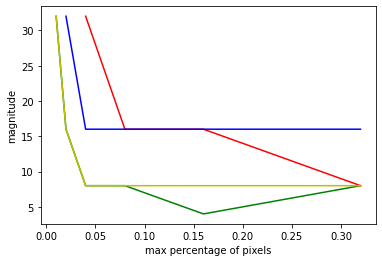

In [ ]:
import matplotlib.pyplot as plt
gx = pixel_percent_list
gy = find_first_success(greedy_yolo, greedy_rcnn, epsilon_list)

rx = pixel_percent_list
ry = find_first_success(random_yolo, random_rcnn, epsilon_list)

hx = pixel_percent_list
hy = find_first_success(hn_yolo, hn_rcnn, epsilon_list)

bx = pixel_percent_list
by = find_first_success(beam_yolo, beam_rcnn, epsilon_list)

plt.plot(gx, gy, '-g')
plt.plot(rx, ry, '-r')
plt.plot(hx, hy, '-b')
plt.plot(bx, by, '-y')
plt.xlabel('max percentage of pixels')
plt.ylabel('magnitude')
plt.show()